This notebook looks at the processed data in terms of how many nulls there are.

In [9]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [10]:
tu = json.load(open('../../../data/processed/dim/depositonce.json'))
hu = json.load(open('../../../data/processed/dim/edoc.json'))
fu = json.load(open('../../../data/processed/dim/refubium.json'))

Ratio of theses to publications..

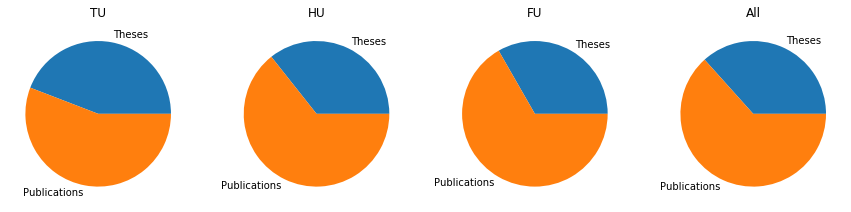

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
titles = ['TU', 'HU', 'FU']
total_theses, total_publications = 0, 0
for i, repo in enumerate([tu, hu, fu]):
    n_theses = sum([doc['type'][1] == 'thesis' for doc in repo])
    n_publications = sum([doc['type'][1] == 'publication' for doc in repo])
    assert n_theses + n_publications == len(repo)
    ax[i].pie([n_theses, n_publications], labels=['Theses', 'Publications'])
    ax[i].set_title(titles[i])
    total_theses += n_theses
    total_publications += n_publications
ax[3].pie([total_theses, total_publications], labels=['Theses', 'Publications'])
ax[3].set_title('All')
plt.show()

No. of publications without a title.

In [12]:
total = 0
for i, repo in enumerate([tu, hu, fu]):
    no_title = sum([doc['title'] is None for doc in repo])
    total += no_title
    print(f'{no_title} documents don\'t have a title in {titles[i]} ({round(no_title/len(repo), 3)} %).')
print(f'In total, {total} documents don\'t have a title ({round(total/(len(tu)+len(hu)+len(fu)), 3)} %).')

3 documents don't have a title in TU (0.0 %).
0 documents don't have a title in HU (0.0 %).
380 documents don't have a title in FU (0.026 %).
In total, 383 documents don't have a title (0.013 %).


No. of publications without an author and avg. authors per publication. Same metrics for each author type.

In [13]:
total = 0
avgs = []
for i, repo in enumerate([tu, hu, fu]):
    no_author = sum([len(doc['authors']) == 0 for doc in repo])
    avg_authors = round(sum([len(doc['authors']) for doc in repo]) / len(repo), 2)
    avg_authors_t = round(sum([len(doc['authors']) for doc in repo if doc['type'][1] == 'thesis']) / len([0 for doc in repo if doc['type'][1] == 'thesis']), 2)
    avg_authors_p = round(sum([len(doc['authors']) for doc in repo if doc['type'][1] == 'publication']) / len([0 for doc in repo if doc['type'][1] == 'publication']), 2)
    avgs.append([avg_authors_t, avg_authors_p])
    total += no_author
    print(f'{no_author} documents don\'t have an author in {titles[i]} ({round(no_author/len(repo), 3)} %).')
    print(f'On avg., documents of {titles[i]} have {avg_authors} authors. Publications have {avg_authors_p} and theses {avg_authors_t} authors on avg.\n')
print(f'In total, {total} documents don\'t have an author ({round(total/(len(tu)+len(hu)+len(fu)), 3)} %).')
print(f'On avg., documents have {round(sum([p+t for p, t in avgs])/6, 2)} authors')

0 documents don't have an author in TU (0.0 %).
On avg., documents of TU have 4.54 authors. Publications have 4.5 and theses 4.6 authors on avg.

0 documents don't have an author in HU (0.0 %).
On avg., documents of HU have 3.36 authors. Publications have 3.15 and theses 3.74 authors on avg.

12 documents don't have an author in FU (0.001 %).
On avg., documents of FU have 4.77 authors. Publications have 5.53 and theses 3.24 authors on avg.

In total, 12 documents don't have an author (0.0 %).
On avg., documents have 4.13 authors


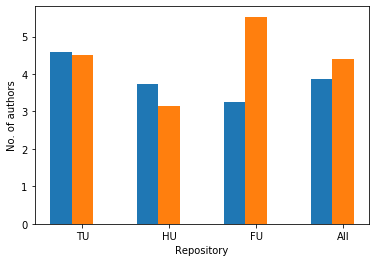

In [14]:
t_avgs = [avg[0] for avg in avgs] + [sum([avg[0] for avg in avgs])/3]
p_avgs = [avg[1] for avg in avgs] + [sum([avg[1] for avg in avgs])/3]
width = .5
plt.bar([0, 2, 4, 6], t_avgs, width)
plt.bar([0.5, 2.5, 4.5, 6.5], p_avgs, width)
plt.xticks(ticks=[0.5, 2.5, 4.5, 6.5], labels=titles+['All'])
plt.ylabel('No. of authors')
plt.xlabel('Repository')
plt.show()

In [15]:
def get_wedges(cnt):
    for key in cnt:
        if cnt[key] < .1 * sum(cnt.values()):
            if 'other' not in cnt:
                cnt['other'] = 0
            cnt['other'] += cnt_t[key]
            del cnt[key]
    print()

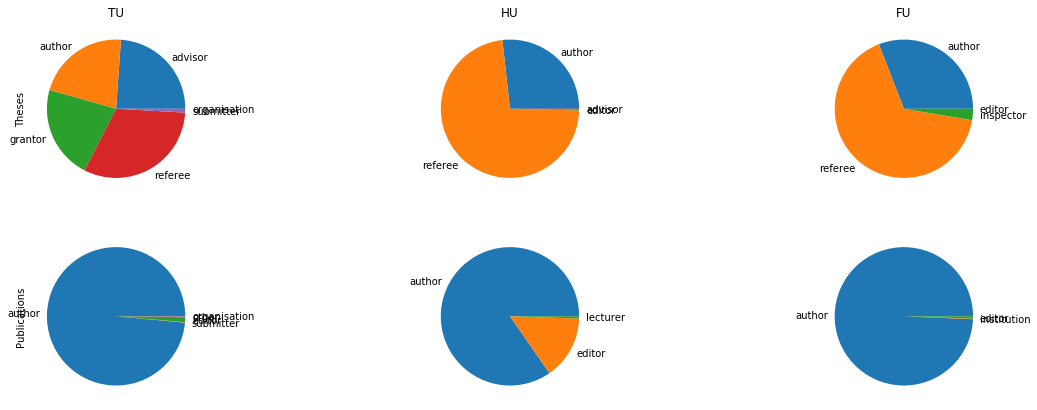

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(20, 7))
titles = ['TU', 'HU', 'FU']
for i, repo in enumerate([tu, hu, fu]):
    authors_t, authors_p = [], []
    for doc in repo:
        if doc['type'][1] == 'thesis':
            authors_t += [author[1] for author in doc['authors']]
        elif doc['type'][1] == 'publication':
            authors_p += [author[1] for author in doc['authors']]
    cnt_t, cnt_p = Counter(authors_t), Counter(authors_p)
    ax[0][i].pie(cnt_t.values(), labels=cnt_t.keys())
    ax[1][i].pie(cnt_p.values(), labels=cnt_p.keys())
    ax[0][i].set_title(titles[i])
ax[0][0].set_ylabel('Theses')
ax[1][0].set_ylabel('Publications')
plt.show()